### Challenge Description

Energy consumption in buildings and industry is often wasted due to user behaviour, human error, and poorly performing equipment. In this context, identifying abnormal consumption power behavior can be an important part of reducing peak energy consumption and changing undesirable user behavior. With the widespread rollouts of smart meters, normal operating consumption can be learned over time and used to identify or flag abnormal consumption. Such information can help indicate to users when their equipment is not operating as normal and can help to change user behavior or to even indicate what the problem appliances may be to implement lasting changes.

This challenge is looking for data scientists to apply their skills to an anomaly detection problem using smart meter data. Ideally, such an algorithm should begin to operate after as little as 3 months and should improve over time. A platform to visualise the anomalies would also be useful. Users can select any type of machine learning algorithms that they wish to in order to detect the anomalies from the data.

### Data
A sample including smart meter data can be found on [kaggle](https://www.kaggle.com/portiamurray/anomaly-detection-smart-meter-data-sample). Participants are encouraged to find other smart meter data to work with in order to test their algorithms.

### Imports

In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import random
from datetime import datetime, timedelta
import collections as cl

### Load file to 'data' dataframe

In [2]:
data = pd.read_csv('data/2018.csv', delimiter=";")
data.columns = ['datetime', 'kWh']
data['datetime'] =  pd.to_datetime(data['datetime'])

data = data.set_index('datetime')
data.head()

,kWh
datetime,
2018-01-01 00:00:00+01:00,23.6
2018-01-01 00:15:00+01:00,23.6
2018-01-01 00:30:00+01:00,22.4
2018-01-01 00:45:00+01:00,23.2
2018-01-01 01:00:00+01:00,23.2


In [3]:
data = data[~data.index.duplicated(keep='first')] # there are 4 entries with the same timestamp

In [4]:
data.iloc[-1]

kWh    20.8
Name: 2018-12-31 23:45:00+01:00, dtype: float64

### How to with timestamps

In [5]:
df = data
df.head()

,kWh
datetime,
2018-01-01 00:00:00+01:00,23.6
2018-01-01 00:15:00+01:00,23.6
2018-01-01 00:30:00+01:00,22.4
2018-01-01 00:45:00+01:00,23.2
2018-01-01 01:00:00+01:00,23.2


In [6]:
for index,row in df.iterrows():
    if index in data.index:
        df.loc[index]['kWh'] = data.loc[index]['kWh']
    else:
        print('Missing value at ', index)

In [7]:
df.head()

,kWh
datetime,
2018-01-01 00:00:00+01:00,23.6
2018-01-01 00:15:00+01:00,23.6
2018-01-01 00:30:00+01:00,22.4
2018-01-01 00:45:00+01:00,23.2
2018-01-01 01:00:00+01:00,23.2


In [8]:
df['freq'] = 0
df['anomaly'] = 0
appr = cl.defaultdict(float)
count = 0
alert_threshold = 0.0002

for index, row in df.iterrows():
    val = row['kWh']
    if pd.isna(val):
        print('Missing value at ', index)
        df.loc[index,'anomaly']= 1
    else:
        count += 1
        if val in appr:
            appr[val] += 1
        else:
            appr[val] = 1
        df.loc[index,'freq'] = appr[val]/count
        if df.loc[index,'freq'] < alert_threshold:
            print('Anomolous value at ', index)
            df.loc[index,'anomaly']= 1

Anomolous value at  2018-02-22 07:15:00+01:00
Anomolous value at  2018-02-22 07:45:00+01:00
Anomolous value at  2018-02-22 08:15:00+01:00
Anomolous value at  2018-02-22 08:30:00+01:00
Anomolous value at  2018-02-22 09:30:00+01:00
Anomolous value at  2018-02-22 09:45:00+01:00
Anomolous value at  2018-02-22 10:00:00+01:00
Anomolous value at  2018-02-22 10:45:00+01:00
Anomolous value at  2018-02-22 14:45:00+01:00
Anomolous value at  2018-02-23 08:00:00+01:00
Anomolous value at  2018-02-23 08:15:00+01:00
Anomolous value at  2018-02-23 09:45:00+01:00
Anomolous value at  2018-02-23 10:00:00+01:00
Anomolous value at  2018-02-23 10:15:00+01:00
Anomolous value at  2018-02-23 10:45:00+01:00
Anomolous value at  2018-02-26 07:45:00+01:00
Anomolous value at  2018-02-26 08:15:00+01:00
Anomolous value at  2018-02-26 09:45:00+01:00
Anomolous value at  2018-02-26 10:00:00+01:00
Anomolous value at  2018-02-26 10:15:00+01:00
Anomolous value at  2018-02-26 10:45:00+01:00
Anomolous value at  2018-02-26 11:

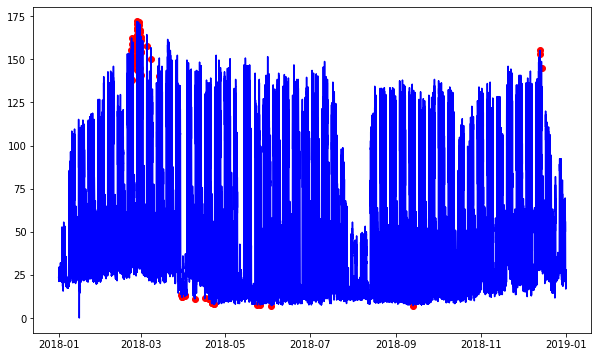

In [9]:
plotdf = df.reset_index()
fig, ax = plt.subplots(figsize=(10,6))
a = plotdf.loc[plotdf['anomaly'] == 1, ['datetime', 'kWh']] #anomaly
ax.plot(plotdf['datetime'], plotdf['kWh'], color='blue')
ax.scatter(a['datetime'], a['kWh'], color='red')
plt.show();

In [10]:
df[df['anomaly'] == 1]

,kWh,freq,anomaly
datetime,,,
2018-02-22 07:15:00+01:00,138.8,0.000199,1
2018-02-22 07:45:00+01:00,144.8,0.000199,1
2018-02-22 08:15:00+01:00,155.6,0.000199,1
2018-02-22 08:30:00+01:00,152.4,0.000199,1
2018-02-22 09:30:00+01:00,146.8,0.000199,1
...,...,...,...
2018-06-03 03:30:00+02:00,7.2,0.000068,1
2018-09-13 03:30:00+02:00,7.2,0.000082,1
2018-12-13 08:15:00+01:00,153.2,0.000180,1


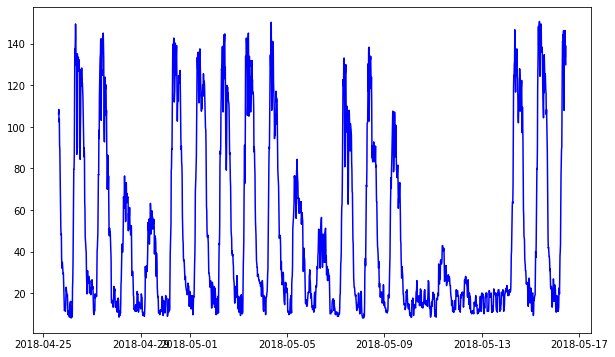

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
a = plotdf[11000:13000].loc[plotdf['anomaly'] == 1, ['datetime', 'kWh']] #anomaly
ax.plot(plotdf[11000:13000]['datetime'], plotdf[11000:13000]['kWh'], color='blue')
ax.scatter(a['datetime'], a['kWh'], color='red')
plt.show();